In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display, HTML
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


#  Linear Regression


## Exercise 

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris)










### Understanding Data

Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
    - Iris Setosa
    - Iris Versicolour
    - Iris Virginica

Descriptive analytics

- What questions would you ask to understand the data?
- What visualization tools to use?

In [ ]:
# import some data to play with
iris = datasets.load_iris()
print(iris.data.shape) #get (numer of rows, number of columns or 'features')
print(iris.DESCR) #get a description of the dataset

(150, 4)
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ==

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


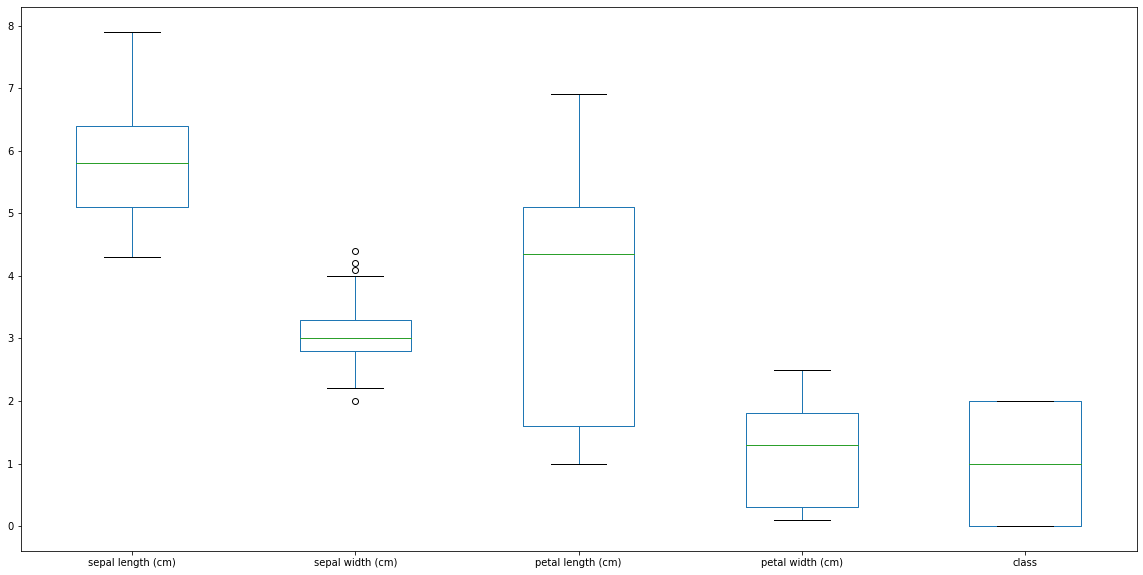

In [ ]:
#Using pandas
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_df['class']=iris.target
iris_df.plot.box(figsize=(20,10))
iris_df.describe(include='all')

### Preparing the data



In [ ]:
# Normalize the data???
X = iris.data[:, :4] # solo tomemos las dos primeras entradas para este ejemplo visual 
y = iris.target

#### Split training and text data

Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

### Modeling

#### Train the model

Train the models consist in  make  the optimization to obtain the long memory parameters of the model.

In [ ]:
# Create linear regressor object (in an array to train all)
models = [svm.SVC(kernel='linear', C=1,gamma=0.1)]

for model in models:
  model.fit(X_train, y_train)
  # The coefficients
  print( model.get_params())
  print('pesos',model.class_weight_)
  print('vectores de soporte',model.support_vectors_)
  print('cantidad de vectores para cada clasificacion',model.n_support_)

{'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.1, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Intercept [1. 1. 1.]
Coeff [[5.4 3.4]
 [4.5 2.3]
 [4.9 3. ]
 [5.4 3.4]
 [5.8 4. ]
 [5.  3. ]
 [5.5 3.5]
 [5.6 2.5]
 [6.3 3.3]
 [7.  3.2]
 [6.  3.4]
 [5.6 2.7]
 [5.6 2.9]
 [6.1 3. ]
 [5.7 3. ]
 [6.9 3.1]
 [5.1 2.5]
 [6.2 2.2]
 [5.7 2.9]
 [5.7 2.8]
 [6.6 3. ]
 [6.4 2.9]
 [4.9 2.4]
 [6.7 3.1]
 [5.7 2.8]
 [5.8 2.7]
 [5.7 2.6]
 [6.3 2.5]
 [6.7 3. ]
 [6.6 2.9]
 [5.6 3. ]
 [5.9 3.2]
 [6.3 2.3]
 [5.8 2.7]
 [6.5 3. ]
 [6.  2.2]
 [6.7 2.5]
 [6.3 2.7]
 [6.3 2.8]
 [4.9 2.5]
 [6.3 2.5]
 [6.5 3. ]
 [5.8 2.7]
 [6.4 2.7]
 [5.9 3. ]
 [6.5 3. ]
 [6.4 2.8]
 [6.5 3.2]
 [6.7 3.3]
 [6.2 3.4]
 [5.7 2.5]
 [6.  3. ]
 [6.3 3.4]
 [6.4 3.2]
 [6.7 3. ]
 [6.7 3.1]
 [5.8 2.7]
 [6.3 2.9]]
Coeff [ 7 27 24]


Understanding Classification

**Not is a result only a way to understand classification**

Never conclude over the train data

In [ ]:
'''
@param X  es usado para obtener el max y minimo valor para hacer la grilla
@param y solo es usado para comparar 
'''
def visual(svc,X,y,title):
  # create a mesh to plot in
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  h = (x_max / x_min)/100
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
  np.arange(y_min, y_max, h))
  plt.subplot(1, 1, 1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
  ##plot the data
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.title(title)
  plt.show()

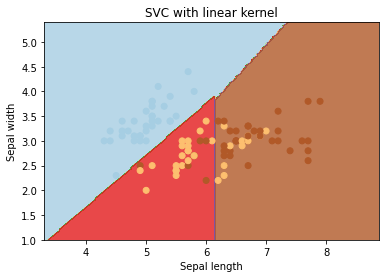

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.76      0.72      0.74        18
   virginica       0.58      0.64      0.61        11

    accuracy                           0.80        45
   macro avg       0.78      0.79      0.78        45
weighted avg       0.80      0.80      0.80        45



In [ ]:
for model in models:
    visual(model,X_train,y_train,'SVC with linear kernel')
    print(classification_report(y_test, model.predict(X_test), target_names=iris.target_names))

## Hyperparameters

Los hiperparámetros son parámetros que no se aprenden directamente dentro de los estimadores. 
En scikit-learn se pasan como argumentos al constructor de las clases de estimador.

Para esto existen dos enfoques genéricos en scikit ([Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html))   para muestrear candidatos de búsqueda: para valores dados, [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) considera exhaustivamente todas las combinaciones de parámetros, mientras que [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) puede muestrear un número dado de candidatos de un espacio de parámetros con una distribución específica.

Para probar cual hyperparametro es mejor debemos hacer cross_validation con algun metodo de dividir los datos de *train* , por ejemplo *k-folds* , y decidrile sobre que [score](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) que queremos trabajar (recall, precision,f1,....).  

Hyper-parameters are parameters that are not directly learnt within estimators. In scikit-learn they are passed as arguments to the constructor of the estimator classes. Typical examples include gamma for Ridge, alpha for Lasso, etc.  It is possible and recommended to search the hyper-parameter space for the best cross validation score.

Any parameter provided when constructing an estimator may be optimized in this manner. Specifically, to find the names and current values for all parameters for a given estimator, use:

estimator.get_params()

Two generic approaches to sampling search candidates are provided in scikit-learn: for given values, [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) exhaustively considers all parameter combinations, while [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV) can sample a given number of candidates from a parameter space with a specified distribution.

[More information](https://scikit-learn.org/stable/modules/grid_search.html)

In [ ]:

import warnings
warnings.filterwarnings('ignore') 
from sklearn.model_selection import GridSearchCV


# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1,],#write the parameters that you want to test
                     'C': [1, ]},#write the parameters that you want to test
                    {'kernel': ['linear'], 'C': [1,]}, #write the parameters that you want to test
                    {'kernel': ['poly'],'degree':[3,], 'C': [1,],'gamma': [1e-3]}
                    #which other test??
                   ]

scores = ['precision' ] #, 'recall','f1' 

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    clf = GridSearchCV(svm.SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print("Grid scores on development set:")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))


    

# Tuning hyper-parameters for precision
Best parameters set found on development set:
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Grid scores on development set:
0.843 (+/-0.108) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.796 (+/-0.113) for {'C': 1, 'kernel': 'linear'}
0.124 (+/-0.013) for {'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'poly'}


## Exercise 

- Try to compare with different classificators

- Use the four input variables to classification


### Test the Model

Can we generalize our model to work good with other data?

In [ ]:
from sklearn.metrics import accuracy_score,median_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score,mean_squared_log_error,explained_variance_score


y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
visual(clf,X,y,'Best model')

### Implementation


How it is going to work inside the process and organization?

## Ejercicio (Alguien tien un ejemplo)











In [ ]:
# Load CSV using Pandas from URL
import pandas as pd
from IPython.display import display, HTML
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

data = 

## Presente sus conclusiones sobre clasificadores


Se recomienda subir el notebook a github
